<a href="https://colab.research.google.com/github/MariaGabrielp/HR_Analitica/blob/main/Perez_Gonzalez_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
###Librerias
import pandas as pd ### Manejo de datos
import sqlite3 as sql #### Bases de datos y archivos sql
#import a_funciones as funciones  ### Archivo de funciones propias
#import sys ## saber ruta de la que carga paquetes
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Lectura de datos**

In [71]:
df_survey = pd.read_csv("https://raw.githubusercontent.com/MariaGabrielp/HR_Analitica/main/employee_survey_data.csv")
df_general = pd.read_csv("https://raw.githubusercontent.com/MariaGabrielp/HR_Analitica/main/general_data.csv")
df_manager = pd.read_csv("https://raw.githubusercontent.com/MariaGabrielp/HR_Analitica/main/manager_survey.csv")
df_retir = pd.read_csv("https://raw.githubusercontent.com/MariaGabrielp/HR_Analitica/main/retirement_info.csv")

##Preprocesamiento de datos

**Vista preliminar de las bases de datos, nulos, categorias y outliners**

Survey- Encuesta realizada a los empleados sobre satisfacción laboral a final de cada año, se tienen el histórico de dos encuestas, la realizada el 31-12-2015 y la que se realizó el 31-12-2016.

In [72]:
df_survey.head()

,Unnamed: 0,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,DateSurvey
0,0,1,3.0,4.0,2.0,2015-12-31
1,1,2,3.0,2.0,4.0,2015-12-31
2,2,3,2.0,2.0,1.0,2015-12-31
3,3,4,4.0,4.0,3.0,2015-12-31
4,4,5,4.0,1.0,3.0,2015-12-31


In [73]:
df_general.head()

,Unnamed: 0,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate
0,0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,Y,11,8,0,1.0,6,1,0,0,2015-12-31
1,1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,Y,23,8,1,6.0,3,5,1,4,2015-12-31
2,2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,Y,15,8,3,5.0,2,5,0,3,2015-12-31
3,3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,Y,11,8,3,13.0,5,8,7,5,2015-12-31
4,4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,Y,12,8,2,9.0,2,6,0,4,2015-12-31


In [74]:
df_manager.head()

,Unnamed: 0,EmployeeID,JobInvolvement,PerformanceRating,SurveyDate
0,0,1,3,3,2015-12-31
1,1,2,2,4,2015-12-31
2,2,3,3,3,2015-12-31
3,3,4,2,3,2015-12-31
4,4,5,3,3,2015-12-31


In [75]:
df_retir.head()

,Unnamed: 0.1,Unnamed: 0,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,0,0,2,Yes,2016-10-15,Resignation,Others
1,1,1,7,Yes,2016-07-20,Resignation,Stress
2,2,2,14,Yes,2016-11-08,Resignation,Others
3,3,3,29,Yes,2016-10-15,Resignation,Others
4,4,4,31,Yes,2016-02-08,Resignation,Salary


In [76]:
###### Verificar lectura correcta de los datos

df_survey.sort_values(by=['EmployeeID'],ascending=1).head(5)


,Unnamed: 0,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,DateSurvey
0,0,1,3.0,4.0,2.0,2015-12-31
4410,0,1,3.0,4.0,2.0,2016-12-31
4411,1,2,3.0,2.0,4.0,2016-12-31
1,1,2,3.0,2.0,4.0,2015-12-31
2,2,3,2.0,2.0,1.0,2015-12-31


In [77]:
df_survey.sort_values(by=["EmployeeID"],ascending=1).head(5)

,Unnamed: 0,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,DateSurvey
0,0,1,3.0,4.0,2.0,2015-12-31
4410,0,1,3.0,4.0,2.0,2016-12-31
4411,1,2,3.0,2.0,4.0,2016-12-31
1,1,2,3.0,2.0,4.0,2015-12-31
2,2,3,2.0,2.0,1.0,2015-12-31


In [78]:
df_general.sort_values(by=["EmployeeID"],ascending=1).head(5)

,Unnamed: 0,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate
0,0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,Y,11,8,0,1.0,6,1,0,0,2015-12-31
4410,0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,Y,11,8,0,1.0,6,1,0,0,2016-12-31
4411,1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,Y,23,8,1,6.0,3,5,1,4,2016-12-31
1,1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,Y,23,8,1,6.0,3,5,1,4,2015-12-31
2,2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,Y,15,8,3,5.0,2,5,0,3,2015-12-31


In [79]:
df_manager.sort_values(by=["EmployeeID"],ascending=1).head(5)

,Unnamed: 0,EmployeeID,JobInvolvement,PerformanceRating,SurveyDate
0,0,1,3,3,2015-12-31
4410,0,1,3,3,2016-12-31
4411,1,2,2,4,2016-12-31
1,1,2,2,4,2015-12-31
2,2,3,3,3,2015-12-31


In [80]:
df_retir.sort_values(by=["EmployeeID"],ascending=1).head(5)

,Unnamed: 0.1,Unnamed: 0,EmployeeID,Attrition,retirementDate,retirementType,resignationReason
0,0,0,2,Yes,2016-10-15,Resignation,Others
1,1,1,7,Yes,2016-07-20,Resignation,Stress
2,2,2,14,Yes,2016-11-08,Resignation,Others
3,3,3,29,Yes,2016-10-15,Resignation,Others
4,4,4,31,Yes,2016-02-08,Resignation,Salary


In [81]:
#Procedemos a unir las tablas para que sea mas fácil trabajarlas
dftotal=df_survey.merge(df_general, on="EmployeeID", how="left")
dftotal2=dftotal.merge(df_manager, on="EmployeeID", how="left")
dftotal3=dftotal2.merge(df_retir, on="EmployeeID", how="left")
# Tenemos finalmente un solo dataframe combinado con todas las tablas a partir de la columna ID
dfdata=dftotal3.copy()
dfdata.head()

,Unnamed: 0_x,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,DateSurvey,Unnamed: 0_y,Age,BusinessTravel,Department,...,Unnamed: 0_x,JobInvolvement,PerformanceRating,SurveyDate,Unnamed: 0.1,Unnamed: 0_y,Attrition,retirementDate,retirementType,resignationReason
0,0,1,3.0,4.0,2.0,2015-12-31,0,51,Travel_Rarely,Sales,...,0,3,3,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,3.0,4.0,2.0,2015-12-31,0,51,Travel_Rarely,Sales,...,0,3,3,2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,3.0,4.0,2.0,2015-12-31,0,51,Travel_Rarely,Sales,...,0,3,3,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,3.0,4.0,2.0,2015-12-31,0,51,Travel_Rarely,Sales,...,0,3,3,2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2,3.0,2.0,4.0,2015-12-31,1,31,Travel_Frequently,Research & Development,...,1,2,4,2015-12-31,0.0,0.0,Yes,2016-10-15,Resignation,Others


In [82]:
# Obtener la cantidad de valores únicos en cada columna
nunique_values = dfdata.nunique()

# Seleccionar las columnas con un solo valor
single_value_columns = nunique_values[nunique_values == 1].index

print("Variables con un único valor: ", single_value_columns)

Variables con un único valor:  Index(['EmployeeCount', 'Over18', 'StandardHours', 'Attrition'], dtype='object')


In [83]:
### las variables 'EmployeeCount', 'Over18', 'StandardHours', 'Attrition'... cuentan con un unico valor, lo que no aportaria a nuestro modelo por ende seran eliminadas
### Eliminacion de variables 
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'Attrition']
dfdata = dfdata.drop(columns=columns_to_drop)
### otras variables que no aportan, ni me dicen nada 
columns_to_drop = ['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0_y']
dfdata = dfdata.drop(columns=columns_to_drop)

In [84]:
## Verificación de valores nulos
print(dfdata.isnull().sum())

EmployeeID                     0
EnvironmentSatisfaction      200
JobSatisfaction              160
WorkLifeBalance              304
DateSurvey                     0
Age                            0
BusinessTravel                 0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
Gender                         0
JobLevel                       0
JobRole                        0
MaritalStatus                  0
MonthlyIncome                  0
NumCompaniesWorked           152
PercentSalaryHike              0
StockOptionLevel               0
TotalWorkingYears             72
TrainingTimesLastYear          0
YearsAtCompany                 0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
InfoDate                       0
JobInvolvement                 0
PerformanceRating              0
SurveyDate                     0
retirementDate             29592
retirementType             29592
resignatio

In [85]:
##tratamiento de nulos 
print(dfdata['EnvironmentSatisfaction'].value_counts())
print(dfdata['EnvironmentSatisfaction'].mean())
print(dfdata['EnvironmentSatisfaction'].median())
print('-------------------------------')

print(dfdata['JobSatisfaction'].value_counts())
print(dfdata['JobSatisfaction'].mean())
print(dfdata['JobSatisfaction'].median())
print('-------------------------------')

print(dfdata['WorkLifeBalance'].value_counts())
print(dfdata['WorkLifeBalance'].mean())
print(dfdata['WorkLifeBalance'].median())
print('-------------------------------')

print(dfdata['NumCompaniesWorked'].value_counts())
print(dfdata['NumCompaniesWorked'].mean())
print(dfdata['NumCompaniesWorked'].median())
print('-------------------------------')

3.0    10800
4.0    10672
2.0     6848
1.0     6760
Name: EnvironmentSatisfaction, dtype: int64
2.7236031927023947
3.0
-------------------------------
4.0    10936
3.0    10584
1.0     6880
2.0     6720
Name: JobSatisfaction, dtype: int64
2.728246013667426
3.0
-------------------------------
3.0    21280
2.0     8152
4.0     3632
1.0     1912
Name: WorkLifeBalance, dtype: int64
2.7614364135407135
3.0
-------------------------------
1.0    12464
0.0     4688
3.0     3792
2.0     3504
4.0     3320
7.0     1776
6.0     1664
5.0     1496
9.0     1248
8.0     1176
Name: NumCompaniesWorked, dtype: int64
2.6948303347756775
2.0
-------------------------------


In [86]:
##al ser el valor que mas aparece, la media sea 3 y la moda de un valor muy cercano a 3; los nulos de esta variable seran reemplazado por 3
dfdata['EnvironmentSatisfaction'] = dfdata['EnvironmentSatisfaction'].fillna(3.0)
dfdata['JobSatisfaction'] = dfdata['JobSatisfaction'].fillna(3.0)
dfdata['WorkLifeBalance'] = dfdata['WorkLifeBalance'].fillna(3.0)
##al ser una variable que cuenta con muy pocos nulos (numero de compañias en las que ha trabajo) los nulos se reemplazaran con el valor que mas aparece en la columna(1.0)
dfdata['NumCompaniesWorked'] = dfdata['NumCompaniesWorked'].fillna(1.0)

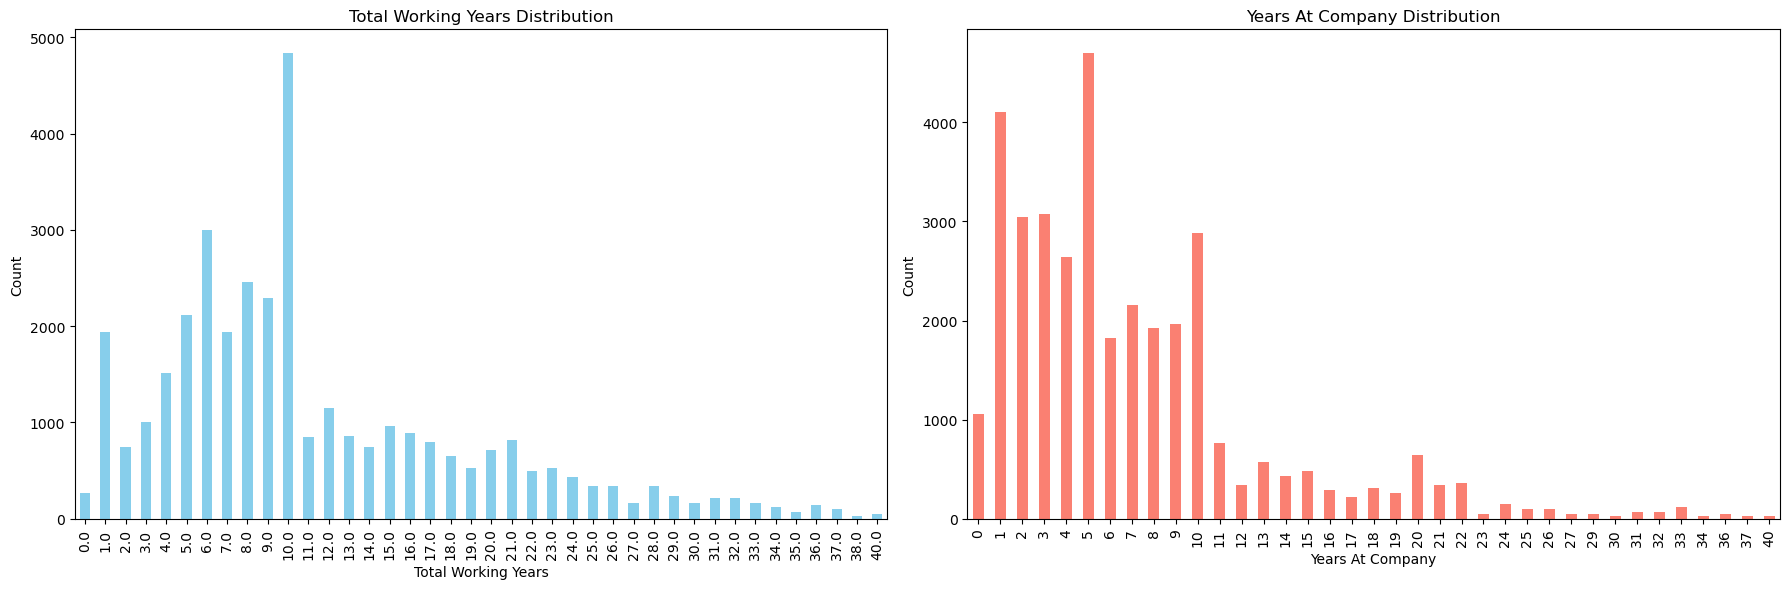

In [87]:
##se puede obsevar que la variable "TotalWorkingYears"; la cual tiene datos faltantes podria asimilarse a  "YearsAtCompany" 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
dfdata['TotalWorkingYears'].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_xlabel('Total Working Years')
ax1.set_ylabel('Count')
ax1.set_title('Total Working Years Distribution')

dfdata['YearsAtCompany'].value_counts().sort_index().plot(kind='bar', color='salmon', ax=ax2)
ax2.set_xlabel('Years At Company')
ax2.set_ylabel('Count')
ax2.set_title('Years At Company Distribution')

plt.tight_layout()
plt.show()


In [88]:
######## eliminamos una o reemplazamos los nulos por los de la otra ??? 
######## que hacemos con las que tienen gran cantidad de nulos ??? las eliminamos ??? pero es que seria eliminar una base de datos completa
